In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#1. Visualizint the tope 15 products (by name ) traded from Australia to Middle East based on 2023 trade value

In [10]:
# Loading the master dataset.
df = pd.read_csv("cleaned_trade_master.csv")

In [11]:
# Convert numeric columns 
df["Value_2023"] = pd.to_numeric(df["Value_2023"], errors = "coerce")

In [12]:
# Group data by product name and sum total trade values 
top_products = (
    df.groupby("Product")["Value_2023"]
    .sum()
    .sort_values(ascending=False)
    .head(15)  # Pick top 15 products
)


In [13]:
print (top_products)

Product
Natural or cultured pearls, precious or semi-precious stones, precious metals, metals clad ...           139195747.0
Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television ...    121909888.0
Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof                            114240524.0
Vehicles other than railway or tramway rolling stock, and parts and accessories thereof                   97682680.0
Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral ...        97498899.0
Commodities not elsewhere specified                                                                       91030918.0
Plastics and articles thereof                                                                             29555178.0
Pharmaceutical products                                                                                   29028690.0
Iron and steel                                          

/var/folders/jd/0gh7qz757lj31lk3mwm20t840000gn/T/ipykernel_1833/2364079497.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


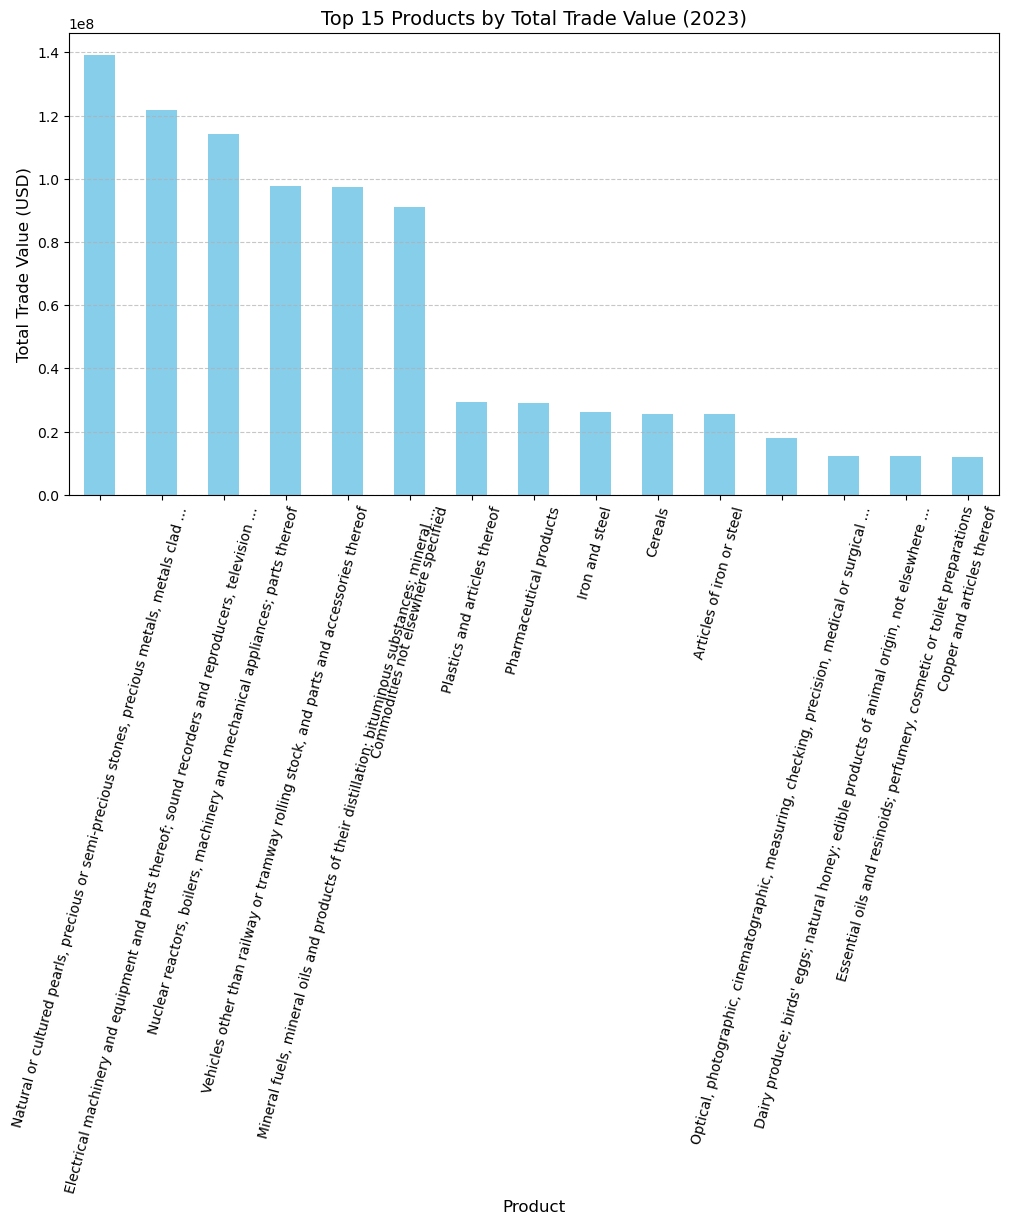

In [14]:
# Plot using matplot lib 
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="skyblue")

plt.title("Top 15 Products by Total Trade Value (2023)", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Trade Value (USD)", fontsize=12)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
#2. Visualize which Middle Eastern countries import the most from Australia (based on 2023 trade value).

In [16]:
#Group by country and sum total trade value 
country_totals = (
    df.groupby("Country")["Value_2023"]
    .sum()
    .sort_values(ascending=False)
)

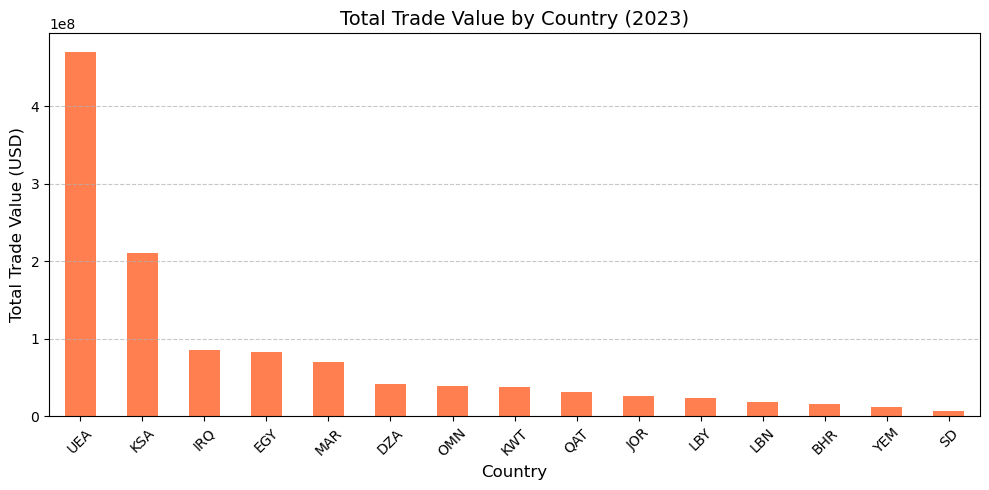

In [17]:
#Plottinng the chart
plt.figure(figsize=(10, 5))
country_totals.plot(kind="bar", color="coral")
plt.title("Total Trade Value by Country (2023)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Trade Value (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
#3. Growth Trend Analysis of 5 year as well as 1 year.

In [19]:
#Ensuring the numeric type
df["Growth_2019_2023"] = pd.to_numeric(df["Growth_2019_2023"], errors='coerce')
df["Growth_2022_2023"] = pd.to_numeric(df["Growth_2022_2023"], errors='coerce')

In [20]:
#Remove outliers using IQR filtering
#5 year growth 
q1_5y, q3_5y = df['Growth_2019_2023'].quantile([0.25, 0.75])
iqr_5y = q3_5y - q1_5y
filtered_5y = df[
    (df['Growth_2019_2023'] >= q1_5y - 1.5 * iqr_5y) &
    (df['Growth_2019_2023'] <= q3_5y + 1.5 * iqr_5y)
]

#1 year growth
q1_1y, q3_1y = df['Growth_2022_2023'].quantile([0.25, 0.75])
iqr_1y = q3_1y - q1_1y
filtered_1y = df[
    (df['Growth_2022_2023'] >= q1_1y - 1.5 * iqr_1y) &
    (df['Growth_2022_2023'] <= q3_1y + 1.5 * iqr_1y)
]

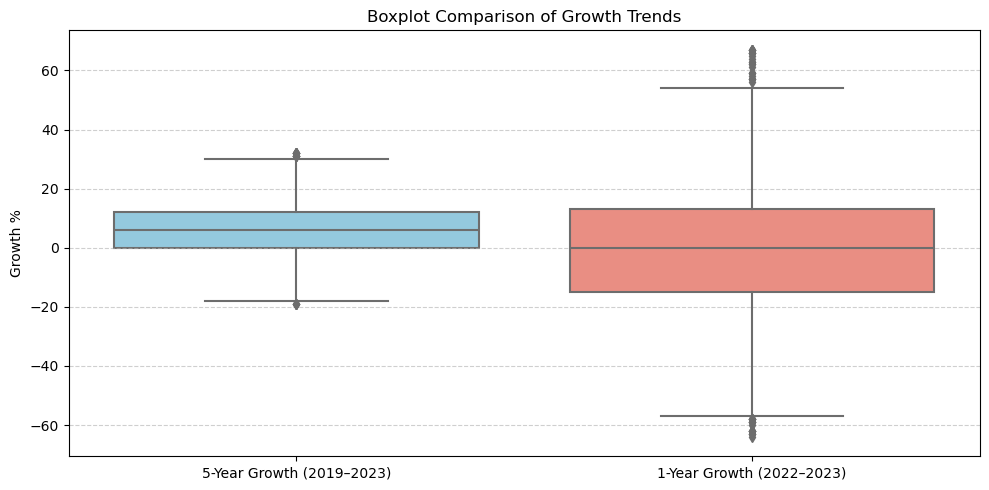

In [21]:
#Box plot comaprision
plt.figure(figsize=(10, 5))
sns.boxplot(data=[
    filtered_5y["Growth_2019_2023"],
    filtered_1y["Growth_2022_2023"]
], palette=["skyblue", "salmon"])

plt.xticks([0, 1], ["5-Year Growth (2019–2023)", "1-Year Growth (2022–2023)"])
plt.title("Boxplot Comparison of Growth Trends")
plt.ylabel("Growth %")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [22]:
#Summary Statistics
summary_5y = filtered_5y['Growth_2019_2023'].describe()
summary_1y = filtered_1y['Growth_2022_2023'].describe()

print("\n 5-Year Growth Summary:")
print(summary_5y)
print("\n 1-Year Growth Summary:")
print(summary_1y)



 5-Year Growth Summary:
count    1312.000000
mean        6.226372
std         9.657908
min       -19.000000
25%         0.000000
50%         6.000000
75%        12.000000
max        32.000000
Name: Growth_2019_2023, dtype: float64

 1-Year Growth Summary:
count    1322.000000
mean       -0.463691
std        24.621199
min       -64.000000
25%       -15.000000
50%         0.000000
75%        13.000000
max        67.000000
Name: Growth_2022_2023, dtype: float64


In [23]:
#4 Trade Balance distribution

In [28]:
# Ensure numeric conversions
numeric_cols = [
    "Value_2023", "Trade_Balance_2023", "Growth_2019_2023",
    "Growth_2022_2023", "World_Growth", "World_Import_Share",
    "World_Import_Rank", "Avg_Distance_km", "Concentration", "Avg_Tariff"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

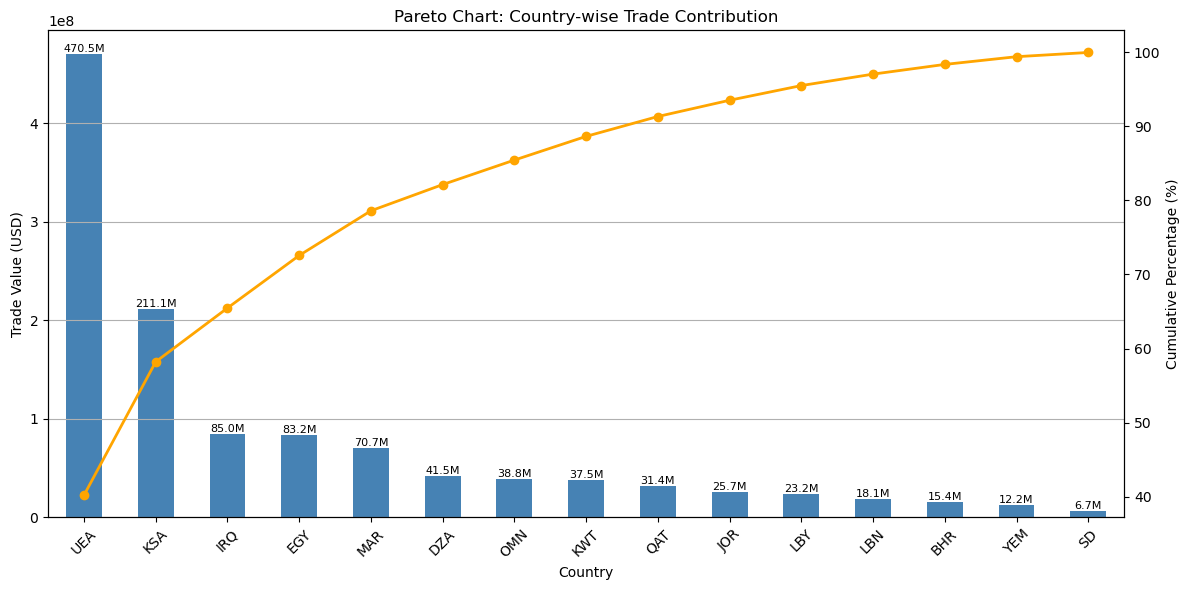

In [53]:
# Regional overview. Pareto Chart: Top countries contributing to trade value
country_trade = df.groupby("Country")["Value_2023"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax1 = country_trade.plot(kind='bar', color='steelblue')
ax2 = ax1.twinx()
cumulative_pct = country_trade.cumsum() / country_trade.sum() * 100
cumulative_pct.plot(ax=ax2, color='orange', marker='o', linewidth=2)

for i, value in enumerate(country_trade):
    ax1.text(i, value, f'{value/1e6:.1f}M', ha='center', va='bottom', fontsize=8)

ax1.set_title("Pareto Chart: Country-wise Trade Contribution")
ax1.set_ylabel("Trade Value (USD)")
ax2.set_ylabel("Cumulative Percentage (%)")
ax1.set_xlabel("Country")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')
plt.tight_layout()
plt.show()

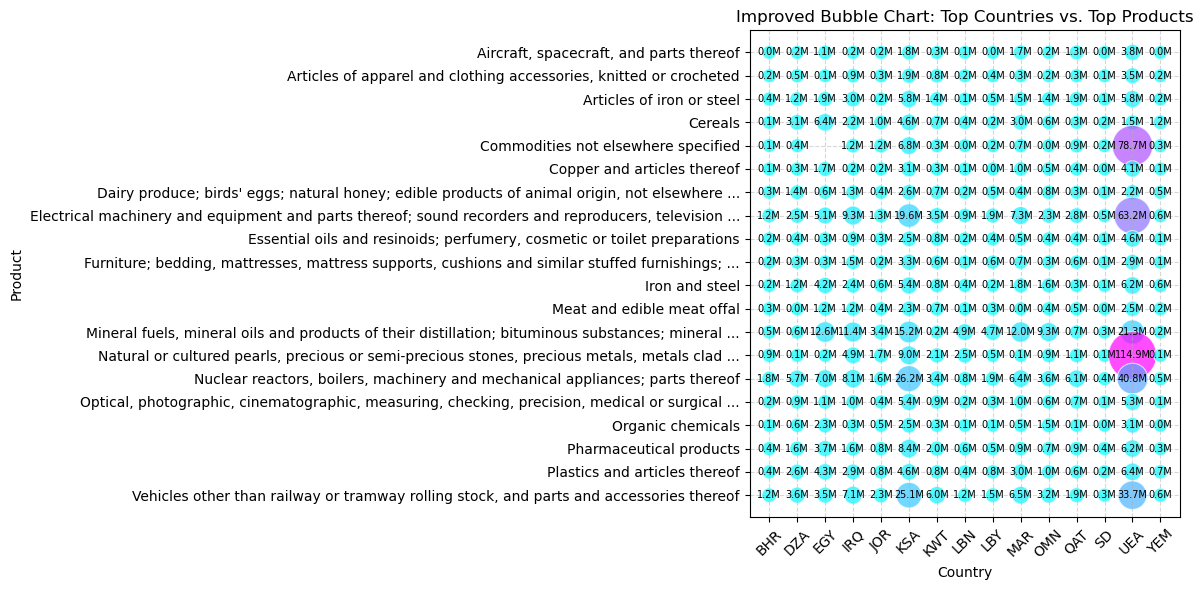

In [54]:
# Bubble Chart: Countries with top 20 products.
top_countries = df.groupby("Country")["Value_2023"].sum().nlargest(15).index
top_products = df.groupby("Product")["Value_2023"].sum().nlargest(20).index

pivot = df[df["Country"].isin(top_countries) & df["Product"].isin(top_products)]
pivot = pivot.groupby(["Country", "Product"])["Value_2023"].sum().reset_index()

plt.figure(figsize=(12, 6))
plot = sns.scatterplot(
    data=pivot,
    x="Country",
    y="Product",
    size="Value_2023",
    hue="Value_2023",
    palette="cool",
    sizes=(100, 1200),
    legend=False,
    alpha=0.7
)
for i in range(pivot.shape[0]):
    plt.text(
        x=pivot["Country"].iloc[i],
        y=pivot["Product"].iloc[i],
        s=f'{pivot["Value_2023"].iloc[i]/1e6:.1f}M',
        fontsize=7,
        ha='center',
        va='center',
        color='black'
    )
plt.title("Improved Bubble Chart: Top Countries vs. Top Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [38]:
# Advanced Country-Level Deep Dive (example: UAE)
uae_df = df[df['Country'] == 'UEA']

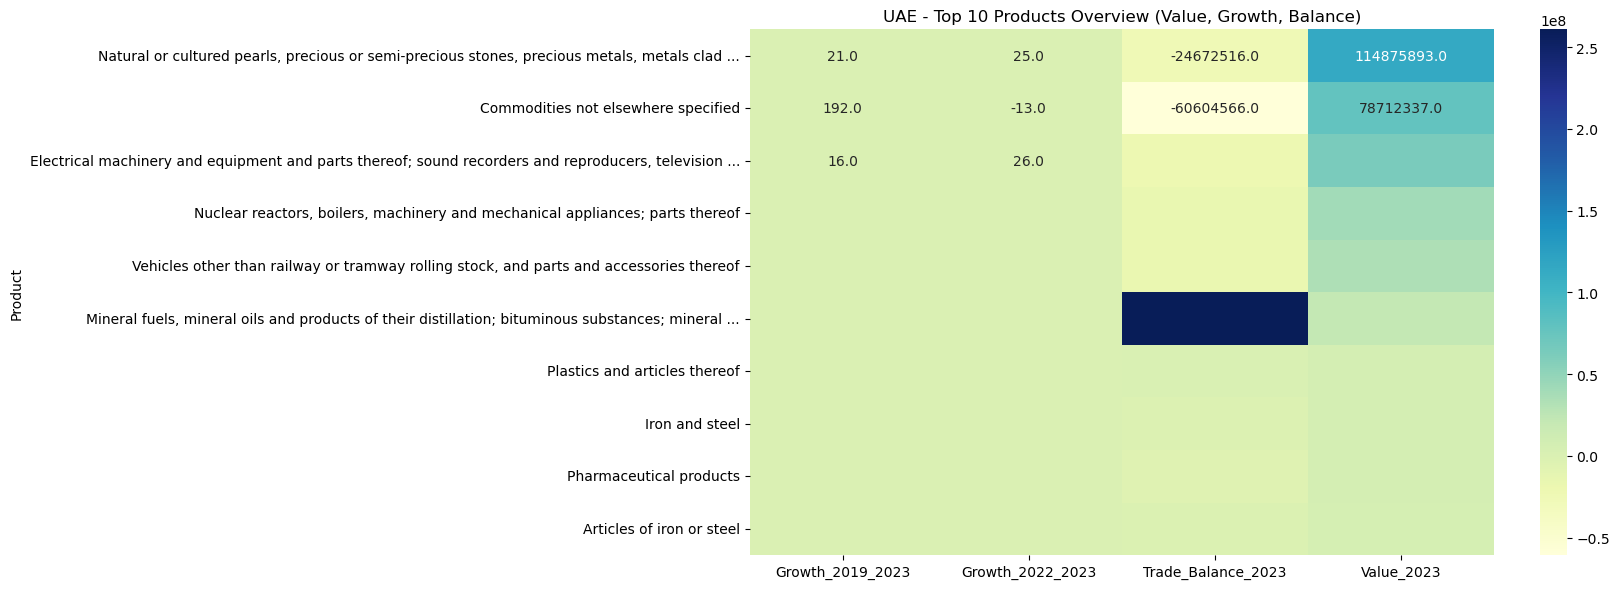

In [55]:
# Heatmap: Product vs Metrics for UAE
uae_pivot = uae_df.pivot_table(
    index="Product",
    values=["Value_2023", "Growth_2019_2023", "Growth_2022_2023", "Trade_Balance_2023"],
    aggfunc="mean"
).sort_values("Value_2023", ascending=False).head(10)

plt.figure(figsize=(17, 6))
sns.heatmap(uae_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("UAE - Top 10 Products Overview (Value, Growth, Balance)")
plt.tight_layout()
plt.show()


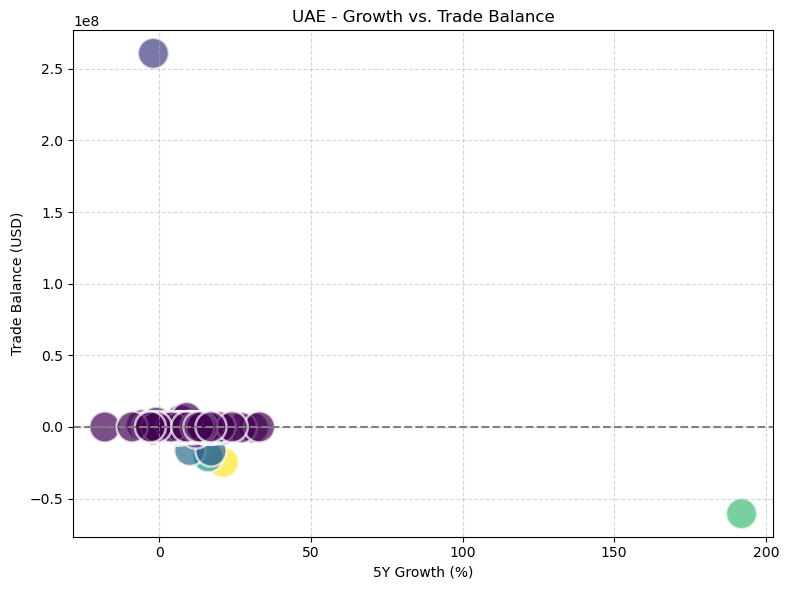

In [52]:
# Scatterplot: Growth vs. Trade Balance
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=uae_df,
    x="Growth_2019_2023",
    y="Trade_Balance_2023",
    size="Value_2023",
    hue="Value_2023",
    palette="viridis",
    alpha=0.7,
    sizes=(500, 500),
    legend=False
)
plt.axhline(0, linestyle="--", color="gray")
plt.title("UAE - Growth vs. Trade Balance")
plt.xlabel("5Y Growth (%)")
plt.ylabel("Trade Balance (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


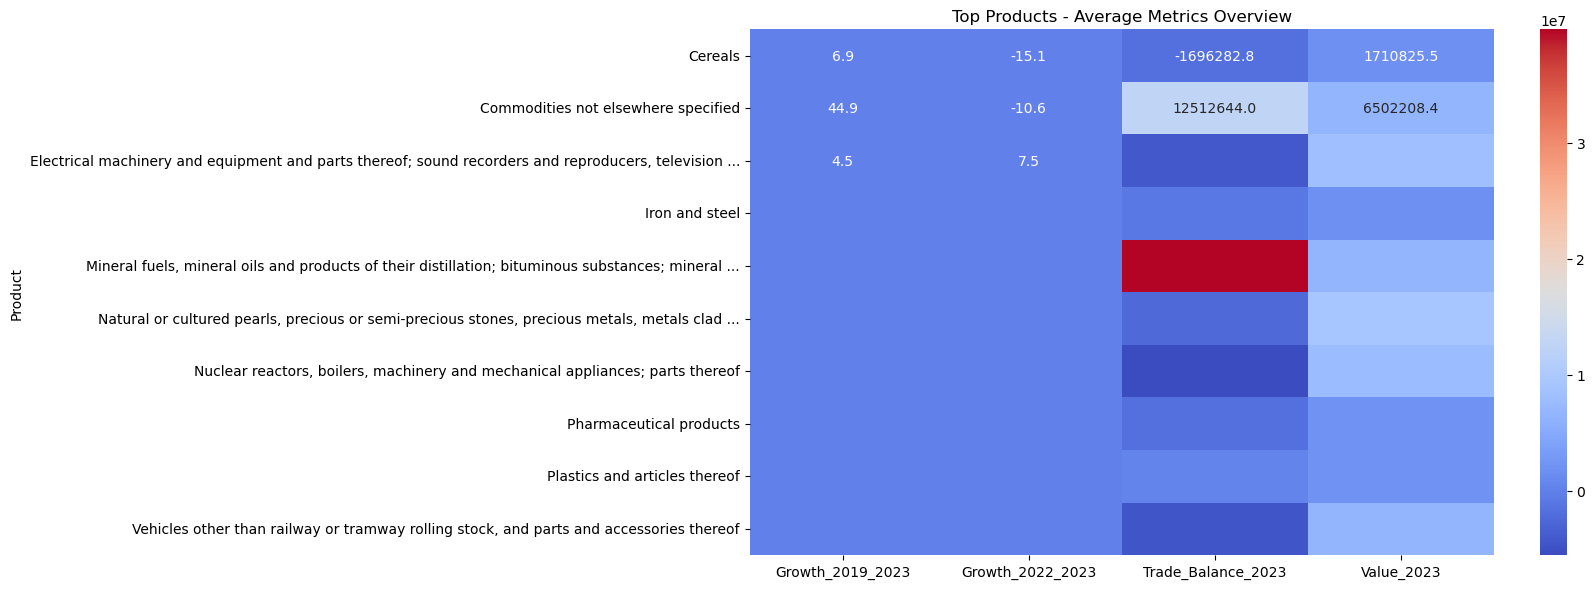

In [59]:
# Advance Product-Centric Insight. Heatmap of top products (across all countries)
top_products = df.groupby("Product")["Value_2023"].sum().sort_values(ascending=False).head(10).index
product_focus = df[df["Product"].isin(top_products)]

product_pivot = product_focus.pivot_table(
    index="Product",
    values=["Value_2023", "Growth_2019_2023", "Growth_2022_2023", "Trade_Balance_2023"],
    aggfunc="mean"
)

plt.figure(figsize=(17, 6))
sns.heatmap(product_pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Top Products - Average Metrics Overview")
plt.tight_layout()
plt.show()


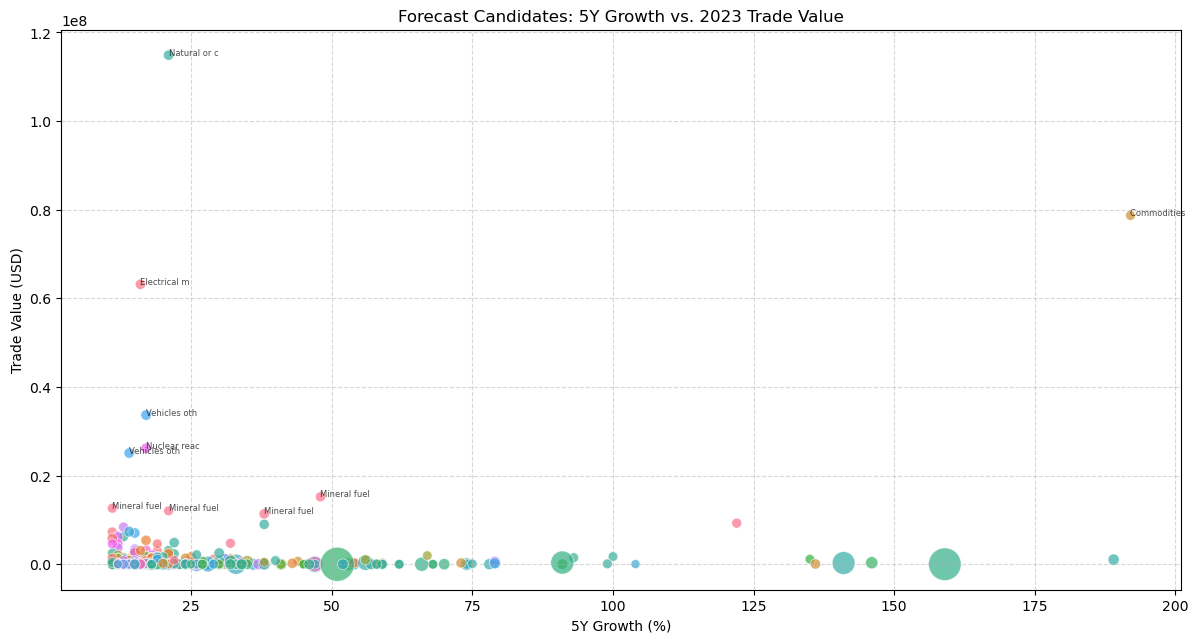

In [87]:
# Forecast Opportunity: Value vs. Growth Bubble Chart
forecast_df = df[df["Growth_2019_2023"] > 10].copy()
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(
    data=forecast_df,
    x="Growth_2019_2023",
    y="Value_2023",
    size="Growth_2022_2023",
    hue="Product",
    alpha=0.7,
    sizes=(40, 600),
    legend=False
)
plt.title("Forecast Candidates: 5Y Growth vs. 2023 Trade Value")
plt.xlabel("5Y Growth (%)")
plt.ylabel("Trade Value (USD)")

# Label top 10 products by Value_2023 only
top10 = forecast_df.sort_values("Value_2023", ascending=False).head(10)
for i in range(top10.shape[0]):
    plt.text(
        x=top10.iloc[i]["Growth_2019_2023"],
        y=top10.iloc[i]["Value_2023"],
        s=top10.iloc[i]["Product"][:12],
        fontsize=6,
        alpha=0.7
    )

plt.grid(True, linestyle='--', alpha=0.5)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.show()

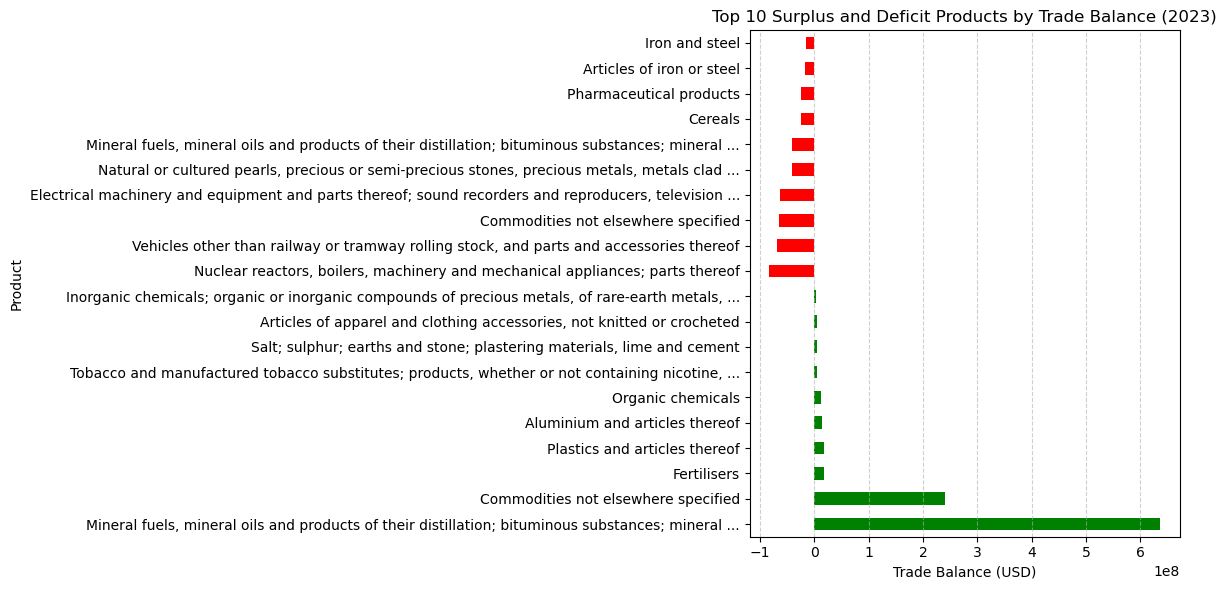

In [88]:
#5 Trade Surplus/ Deficit Bar Chart
surplus = df[df["Trade_Balance_2023"] > 0].groupby("Product")["Trade_Balance_2023"].sum().sort_values(ascending=False).head(10)
deficit = df[df["Trade_Balance_2023"] < 0].groupby("Product")["Trade_Balance_2023"].sum().sort_values().head(10)

combined = pd.concat([surplus, deficit])
plt.figure(figsize=(12, 6))
colors = ['green' if val > 0 else 'red' for val in combined]
combined.plot(kind='barh', color=colors)
plt.title("Top 10 Surplus and Deficit Products by Trade Balance (2023)")
plt.xlabel("Trade Balance (USD)")
plt.ylabel("Product")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()